# Importing dependencies and dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('insurance.csv')

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
# Features
X = df.drop(['charges'], axis=1)
# Labels
y = df['charges']

In [51]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [52]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Data preprocessing

## Split the dataset into train & test (For prediction purpose only)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Create a piepline

In [54]:
# Encoding categorical labels & apply scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LinearRegression

# Instead of just using same test data we change the test data and train the model again to get the score
from sklearn.model_selection import cross_val_score
# For cross validation since test data is changing
from sklearn.pipeline import Pipeline

In [75]:
# Categorical columns
columns_to_encode = ['sex', 'smoker','region']
# Selective Numeric columns
numeric_cols = ['age', 'bmi']

numeric_pipeline = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(degree=4, include_bias=False)),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('encoder', OneHotEncoder(sparse_output=False), columns_to_encode)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# Evaluate the model

In [76]:
# Goes through columntransformer then trains for each test block & returns r2_score for each fold
scores = cross_val_score(pipeline, X, y, cv=5)
print("CV R² scores:", scores)
print("Mean R² score:", scores.mean())

CV R² scores: [0.76105074 0.71237704 0.77283888 0.73350619 0.76054986]
Mean R² score: 0.7480645408624322


# Plot

In [77]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

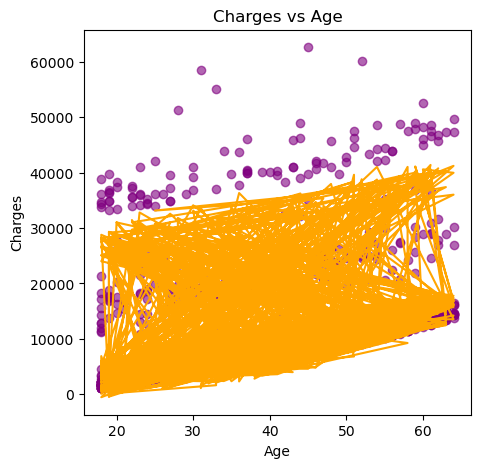

In [78]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_train['age'], y=y_train, color='purple', alpha=0.6)
plt.plot(X_train['age'], y_train_pred, color='orange')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

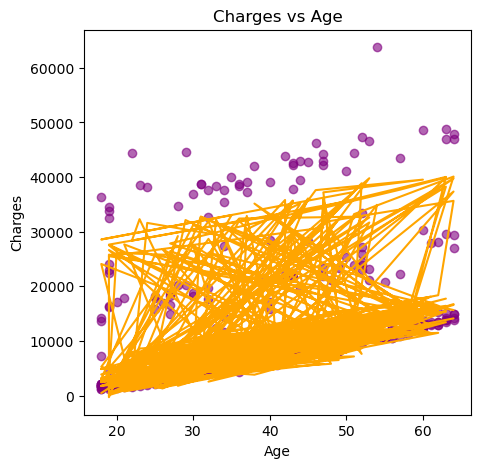

In [79]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['age'], y=y_test, color='purple', alpha=0.6)
plt.plot(X_test['age'], y_test_pred, color='orange')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

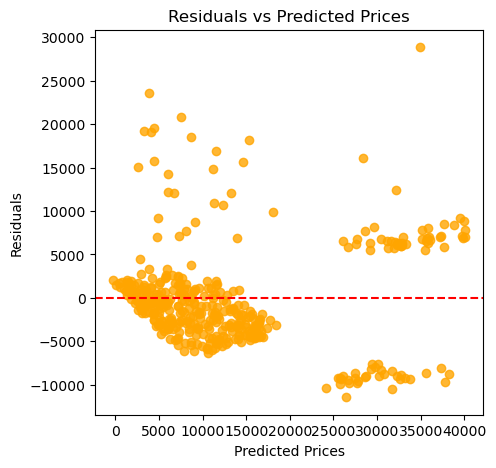

In [80]:
residuals = y_test - y_test_pred
plt.figure(figsize=(5,5))
plt.scatter(x=y_test_pred, y=residuals, alpha= 0.8, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

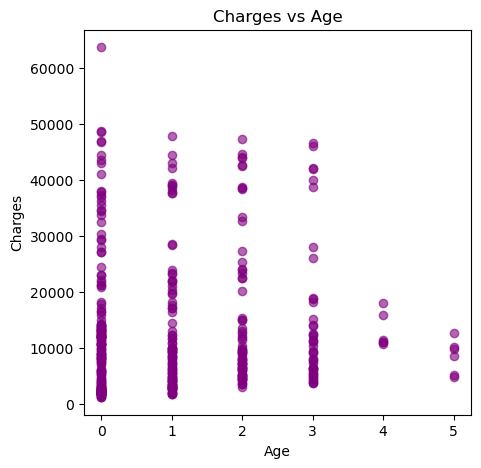

In [81]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['children'], y=y_test, color='purple', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

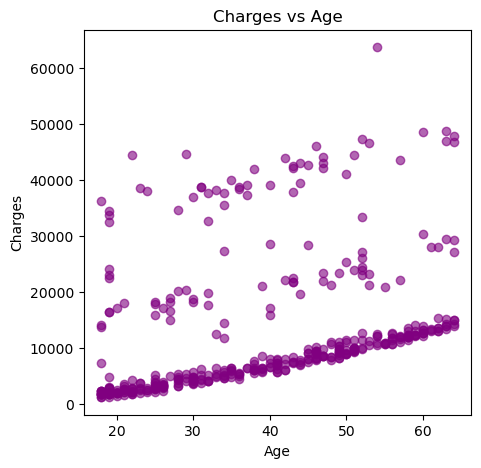

In [82]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['age'], y=y_test, color='purple', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

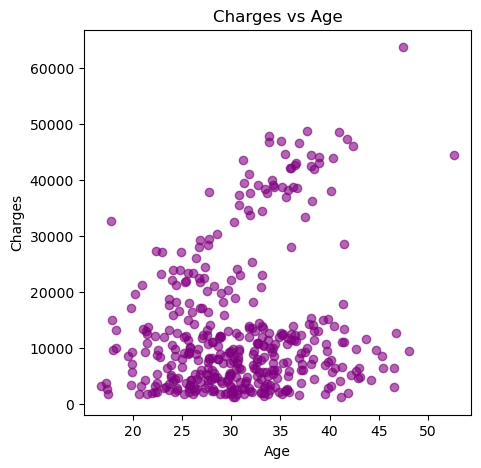

In [83]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['bmi'], y=y_test, color='purple', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()